In [25]:
import sqlite3
import pandas as pd

In [26]:
# Here I check the available tables and their columns to understand the structure of the database

In [27]:
conn = sqlite3.connect("movie.sqlite")
cur = conn.cursor()

# Show tables
query = "SELECT name FROM sqlite_master WHERE type='table'"
cur.execute(query)
cur.fetchall()

# Check structure of each table
query = "PRAGMA table_info(genre)"
cur.execute(query)
cur.fetchall()

query = "PRAGMA table_info(earning)"
cur.execute(query)
cur.fetchall()

query = "PRAGMA table_info(IMDB)"
cur.execute(query)
cur.fetchall()

[(0, 'Movie_id', 'TEXT', 0, None, 0),
 (1, 'Title', 'TEXT', 0, None, 0),
 (2, 'Rating', 'DECIMAL', 0, None, 0),
 (3, 'TotalVotes', 'INTEGER', 0, None, 0),
 (4, 'MetaCritic', 'DECIMAL', 0, None, 0),
 (5, 'Budget', 'DOUBLE', 0, None, 0),
 (6, 'Runtime', 'TEXT', 0, None, 0),
 (7, 'CVotes10', 'TEXT', 0, None, 0),
 (8, 'CVotes09', 'TEXT', 0, None, 0),
 (9, 'CVotes08', 'TEXT', 0, None, 0),
 (10, 'CVotes07', 'TEXT', 0, None, 0),
 (11, 'CVotes06', 'TEXT', 0, None, 0),
 (12, 'CVotes05', 'TEXT', 0, None, 0),
 (13, 'CVotes04', 'TEXT', 0, None, 0),
 (14, 'CVotes03', 'TEXT', 0, None, 0),
 (15, 'CVotes02', 'TEXT', 0, None, 0),
 (16, 'CVotes01', 'TEXT', 0, None, 0),
 (17, 'CVotesMale', 'TEXT', 0, None, 0),
 (18, 'CVotesFemale', 'TEXT', 0, None, 0),
 (19, 'CVotesU18', 'TEXT', 0, None, 0),
 (20, 'CVotesU18M', 'TEXT', 0, None, 0),
 (21, 'CVotesU18F', 'TEXT', 0, None, 0),
 (22, 'CVotes1829', 'TEXT', 0, None, 0),
 (23, 'CVotes1829M', 'TEXT', 0, None, 0),
 (24, 'CVotes1829F', 'TEXT', 0, None, 0),
 (25, 'CV

In [28]:
# All movies with their rating
query = """
SELECT Title,
       Rating,
       TotalVotes
FROM IMDB
ORDER BY Rating DESC, TotalVotes DESC
"""
pd.read_sql(query, conn)

,Title,Rating,TotalVotes
0,Inception (2010),8.8,1609713
1,Interstellar (2014),8.6,1075163
2,Whiplash (2014),8.5,492285
3,The Dark Knight Rises (2012),8.4,1240780
4,Django Unchained (2012),8.4,1056822
...,...,...,...
112,Disconnect (2012),7.6,65448
113,Tyrannosaur (2011),7.6,26016
114,Scott Pilgrim vs. the World (2010),7.5,297633
115,Hugo (2011),7.5,261953


In [29]:
# Filtered list of movies with high IMDb rating, many votes, strong critic score and reasonable budget.

In [30]:
# Highly rated and very popular movies
query = """
SELECT Title,
       Rating,
       TotalVotes,
       MetaCritic,
       Budget
FROM IMDB
WHERE Rating > 8
  AND TotalVotes > 500000
  AND MetaCritic > 80
  AND Budget < 100000000
ORDER BY Rating DESC, TotalVotes DESC
"""
pd.read_sql(query, conn)

,Title,Rating,TotalVotes,MetaCritic,Budget
0,The Grand Budapest Hotel (2014),8.1,541526,88,25000000.0


In [31]:
# Here I join the IMDB and genre tables to calculate the average IMDb rating per genre. This helps identify which genres tend to receive higher ratings overall.

In [32]:
# Average rating and number of movies by genre
query = """
SELECT g.genre,
       ROUND(AVG(i.Rating), 2) AS avg_rating,
       COUNT(*) AS num_movies
FROM IMDB i
JOIN genre g ON i.Movie_id = g.Movie_id
GROUP BY g.genre
ORDER BY avg_rating DESC
"""
pd.read_sql(query, conn)

,genre,avg_rating,num_movies
0,Music,8.23,3
1,Western,8.00,2
2,Sci-Fi,7.99,18
3,History,7.95,6
4,Mystery,7.91,7
5,Animation,7.90,13
6,Adventure,7.90,43
7,,7.89,41
8,Action,7.88,33
9,Crime,7.87,11


In [33]:
#Here I join IMDB with the earning table to see which movies earned the most worldwide and how they are rated by users.

In [34]:
# Top 10 movies by worldwide earnings and their ratings
query = """
SELECT i.Title,
       i.Rating,
       e.Domestic,
       e.Worldwide
FROM IMDB i
JOIN earning e ON i.Movie_id = e.Movie_id
ORDER BY e.Worldwide DESC
LIMIT 10
"""
pd.read_sql(query, conn)

,Title,Rating,Domestic,Worldwide
0,Star Wars: The Force Awakens (2015),8.1,936662225,2.068224e+09
1,The Avengers (2012),8.1,623357910,1.518813e+09
2,Captain America: Civil War (2016),7.9,408084349,1.153304e+09
3,Skyfall (2012),7.8,304360277,1.108561e+09
4,The Dark Knight Rises (2012),8.4,448139099,1.084939e+09
5,Toy Story 3 (2010),8.3,415004880,1.066970e+09
6,Rogue One (2016),7.9,532177324,1.056057e+09
7,Zootopia (2016),8.1,341268248,1.023784e+09
8,The Hobbit: An Unexpected Journey (2012),7.9,303003568,1.021104e+09
9,Harry Potter and the Deathly Hallows: Part 1 (...,7.7,295983305,9.602833e+08


In [35]:
#I group movies by rating levels and calculate their average worldwide earnings to see whether higher rated movies tend to earn more money.

In [36]:
# Average worldwide earnings by rating bucket
query = """
SELECT
    CASE
        WHEN Rating >= 8 THEN 'High (>=8)'
        WHEN Rating BETWEEN 7 AND 7.99 THEN 'Medium (7-7.99)'
        ELSE 'Low (<7)'
    END AS rating_group,
    ROUND(AVG(e.Worldwide), 0) AS avg_worldwide,
    COUNT(*) AS num_movies
FROM IMDB i
JOIN earning e ON i.Movie_id = e.Movie_id
GROUP BY rating_group
ORDER BY avg_worldwide DESC
"""
pd.read_sql(query, conn)

,rating_group,avg_worldwide,num_movies
0,High (>=8),461230361.0,39
1,Medium (7-7.99),279951837.0,78


In [37]:
#Here I join all three tables and compute a simple return-on-investment measure: Worldwide / Budget. This shows which genres tend to generate more box office per dollar invested.

In [38]:
# Average ROI (Worldwide / Budget) by genre
query = """
SELECT g.genre,
       ROUND(AVG(e.Worldwide / i.Budget), 2) AS avg_roi,
       COUNT(*) AS num_movies
FROM IMDB i
JOIN earning e ON i.Movie_id = e.Movie_id
JOIN genre g   ON i.Movie_id = g.Movie_id
WHERE i.Budget IS NOT NULL
  AND i.Budget > 0
GROUP BY g.genre
HAVING COUNT(*) >= 5
ORDER BY avg_roi DESC
"""
pd.read_sql(query, conn)

,genre,avg_roi,num_movies
0,Biography,7.73,21
1,,6.97,41
2,Thriller,6.70,14
3,Romance,6.66,13
4,History,6.49,6
5,Fantasy,6.07,7
6,Drama,6.07,77
7,Comedy,5.13,31
8,Adventure,4.53,43
9,Action,4.47,33


In [39]:
#In this query I analyze how important domestic earnings are for each genre by looking at the average share of domestic box office in total worldwide earnings.

In [40]:
# Domestic vs Worldwide share by genre
query = """
SELECT g.genre,
       ROUND(AVG(e.Domestic), 0)   AS avg_domestic,
       ROUND(AVG(e.Worldwide), 0)  AS avg_worldwide,
       ROUND(AVG(1.0 * e.Domestic / e.Worldwide), 2) AS avg_domestic_share
FROM IMDB i
JOIN earning e ON i.Movie_id = e.Movie_id
JOIN genre g   ON i.Movie_id = g.Movie_id
WHERE e.Worldwide IS NOT NULL
  AND e.Worldwide > 0
GROUP BY g.genre
ORDER BY avg_domestic_share DESC
"""
pd.read_sql(query, conn)

,genre,avg_domestic,avg_worldwide,avg_domestic_share
0,Sport,66343396.0,102276971.0,0.64
1,,80807316.0,200520192.0,0.59
2,Crime,69797312.0,149472625.0,0.57
3,Romance,51508949.0,122617439.0,0.54
4,Drama,72688599.0,169078486.0,0.54
5,Western,167024220.0,338822583.0,0.53
6,Thriller,136410962.0,355131282.0,0.53
7,History,95305988.0,175640205.0,0.53
8,Mystery,144279337.0,303449717.0,0.50
9,Comedy,109327252.0,276953177.0,0.48


**HOMEWORK 4**


In [43]:
query = """
SELECT g.genre,
       ROUND(AVG(i.Rating), 2) AS avg_rating
FROM IMDB i
JOIN genre g ON i.Movie_id = g.Movie_id
GROUP BY g.genre
ORDER BY avg_rating DESC
"""
df_genre_rating = pd.read_sql(query, conn)
df_genre_rating

,genre,avg_rating
0,Music,8.23
1,Western,8.00
2,Sci-Fi,7.99
3,History,7.95
4,Mystery,7.91
5,Animation,7.90
6,Adventure,7.90
7,,7.89
8,Action,7.88
9,Crime,7.87


In [48]:
import matplotlib.pyplot as plt

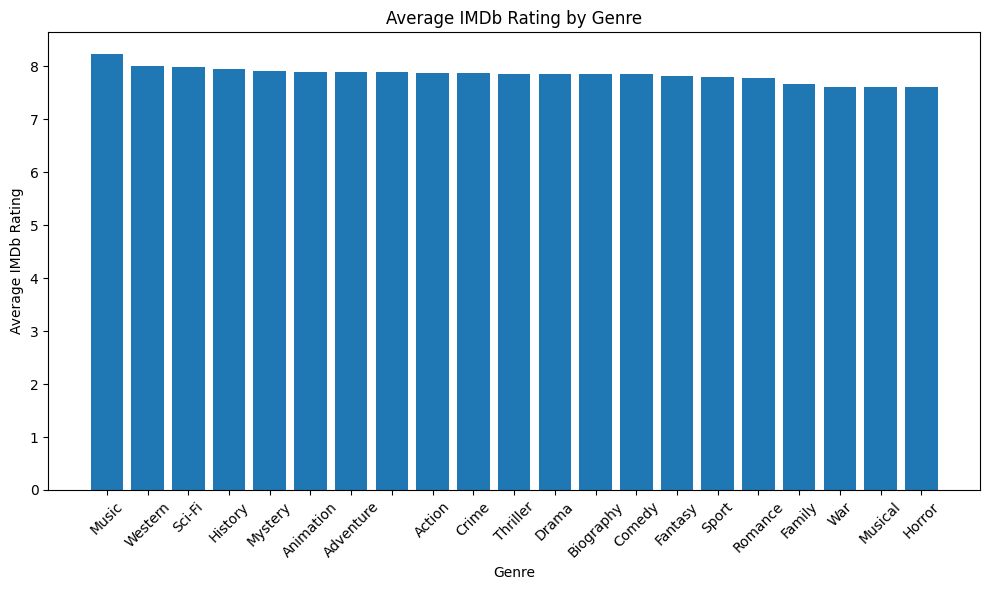

In [47]:
plt.figure(figsize=(10,6))
plt.bar(df_genre_rating['genre'], df_genre_rating['avg_rating'])

plt.xlabel("Genre")
plt.ylabel("Average IMDb Rating")
plt.title("Average IMDb Rating by Genre")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
#This bar chart shows the average IMDb rating for each movie genre. Drama-related genres tend to have higher average ratings, while someaction-oriented genres receive lower scores. This indicates that audiences generally rate story-driven movies more favorably.

In [49]:
query = """
SELECT i.Rating,
       e.Worldwide
FROM IMDB i
JOIN earning e ON i.Movie_id = e.Movie_id
WHERE e.Worldwide IS NOT NULL
"""
df_rating_earning = pd.read_sql(query, conn)
df_rating_earning

,Rating,Worldwide
0,8.1,1.877332e+08
1,7.6,6.073880e+07
2,7.7,3.918778e+07
3,7.8,8.710045e+07
4,7.9,1.983949e+07
...,...,...
112,8.5,4.898204e+07
113,7.7,4.712229e+08
114,8.0,7.478628e+08
115,7.8,3.536241e+08


In [50]:
import seaborn as sns

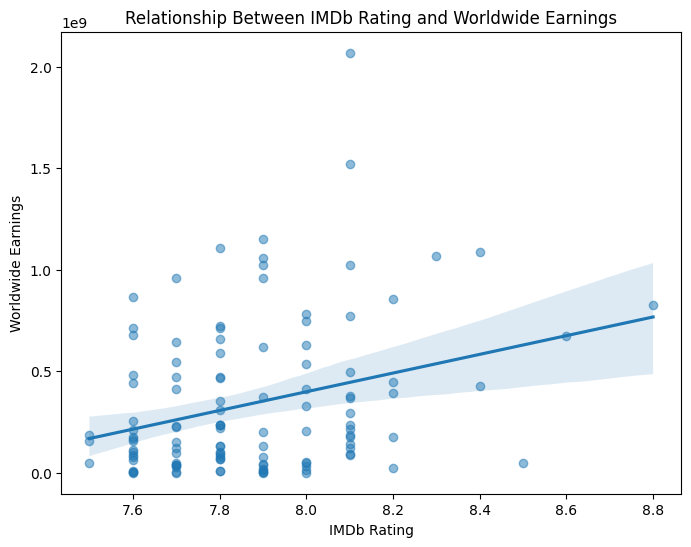

In [51]:
plt.figure(figsize=(8,6))
sns.regplot(
    x='Rating',
    y='Worldwide',
    data=df_rating_earning,
    scatter_kws={'alpha':0.5}
)

plt.xlabel("IMDb Rating")
plt.ylabel("Worldwide Earnings")
plt.title("Relationship Between IMDb Rating and Worldwide Earnings")
plt.show()

In [52]:
#This visualization illustrates the relationship between IMDb ratings and worldwide box office earnings. While higher-rated movies often earn more, the relationship is not perfectly linear, suggesting that factors beyond rating—such as marketing or franchise popularity—also influence revenue.

In [53]:
query = """
SELECT i.Title,
       i.Rating,
       e.Worldwide
FROM IMDB i
JOIN earning e ON i.Movie_id = e.Movie_id
ORDER BY e.Worldwide DESC
LIMIT 20
"""
df_top_movies = pd.read_sql(query, conn)
df_top_movies

,Title,Rating,Worldwide
0,Star Wars: The Force Awakens (2015),8.1,2.068224e+09
1,The Avengers (2012),8.1,1.518813e+09
2,Captain America: Civil War (2016),7.9,1.153304e+09
3,Skyfall (2012),7.8,1.108561e+09
4,The Dark Knight Rises (2012),8.4,1.084939e+09
5,Toy Story 3 (2010),8.3,1.066970e+09
6,Rogue One (2016),7.9,1.056057e+09
7,Zootopia (2016),8.1,1.023784e+09
8,The Hobbit: An Unexpected Journey (2012),7.9,1.021104e+09
9,Harry Potter and the Deathly Hallows: Part 1 (...,7.7,9.602833e+08


In [54]:
import plotly.express as px

In [55]:
fig = px.bar(
    df_top_movies,
    x='Title',
    y='Worldwide',
    color='Rating',
    title='Top 20 Movies by Worldwide Earnings',
    labels={'Worldwide': 'Worldwide Earnings'}
)

fig.update_layout(
    xaxis_tickangle=-45,
    height=600
)

fig.show()

In [56]:
#This interactive bar chart highlights the top 20 highest-grossing movies. Although many of these films have high IMDb ratings, some movies with moderate ratings still achieve large earnings, reinforcing the idea that commercial success is influenced by multiple factors.